##### Analise e predição de preços de alugueis de casas
Nesse notebook foi realizado a análise e criação de um modelo de deep learning que faz predições de preços de casas brasileiras com base em algumas características da construção da casa.

Membros da equipe:
* Thiago Monteles
* Mateus Gomes


## GUIA
### Tratamento e analise dos dados
##### 1. Analisando Preço total
* 1.1 Analise inicial.
* 1.2 Alguns tratamentos pra melhorar a modelagem e visualização dos dados.
* 1.3 Analisando variaveis com o preco total.
* 1.3.1 Analizando a influencia de area, banheiros e seguro incendio no preco total.

##### 2.Analisando variaveis com a area
* 2.1 Análise dos quartos

#### 3. Analisando variaveis com bathroom

##### 4. Analisando variaveis com fire insurance

### Criando a rede neural para predição dos dados
##### 1. Pré-processamento
##### 2. Modelagem da rede
##### 3. Resultados


### Tratamento e analise dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline   

In [2]:
DF = pd.read_csv("houses_to_rent_v2.csv")

In [3]:
DF.sample(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3094,São Paulo,280,3,4,2,-,acept,furnished,8000,8000,667,121,16790
6511,São Paulo,49,2,1,1,5,acept,not furnished,300,1700,21,22,2043
349,São Paulo,250,3,4,3,-,not acept,not furnished,0,3740,234,57,4031
9825,São Paulo,30,1,1,1,8,not acept,furnished,658,3500,123,45,4326
3652,Belo Horizonte,120,3,3,1,2,acept,not furnished,0,2200,145,30,2675


### 1. Analisando Preço total

#### 1.1 Analise inicial.

In [4]:
#verificando nullos
DF.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
DF.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [6]:
#Verificando numero de dados por cidade
DF['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

#### 1.2 Alguns tratamentos pra melhorar a modelagem e visualização dos dados.

In [7]:
#tradando coluna floor
DF = DF[DF.floor != '-']
DF.floor = DF.floor.astype('int64')

In [8]:
#Eliminando outlines que tem dados com a media + 4 std
for coluna in DF.columns:
    if 'float' in str(DF[coluna].dtype) or 'int' in str(DF[coluna].dtype) and coluna not in['bathroom', 'rooms', 'parking spaces']:
        DF = DF[ DF[coluna] < DF[coluna].mean() + DF[coluna].std()*4 ]

In [9]:
#olhando a quantidade de dados que tem desvio padrao maiores que sua media em 3.5 vezes
DF[DF.area > DF.area.mean() + DF.area.std()*3.5].count()

city                   78
area                   78
rooms                  78
bathroom               78
parking spaces         78
floor                  78
animal                 78
furniture              78
hoa (R$)               78
rent amount (R$)       78
property tax (R$)      78
fire insurance (R$)    78
total (R$)             78
dtype: int64

In [10]:
#Eliminando linhas que contem o desvio de area maior em 3.5 vezes do que a media
DF = DF[DF.area <= DF.area.mean() + DF.area.std()*3.5]

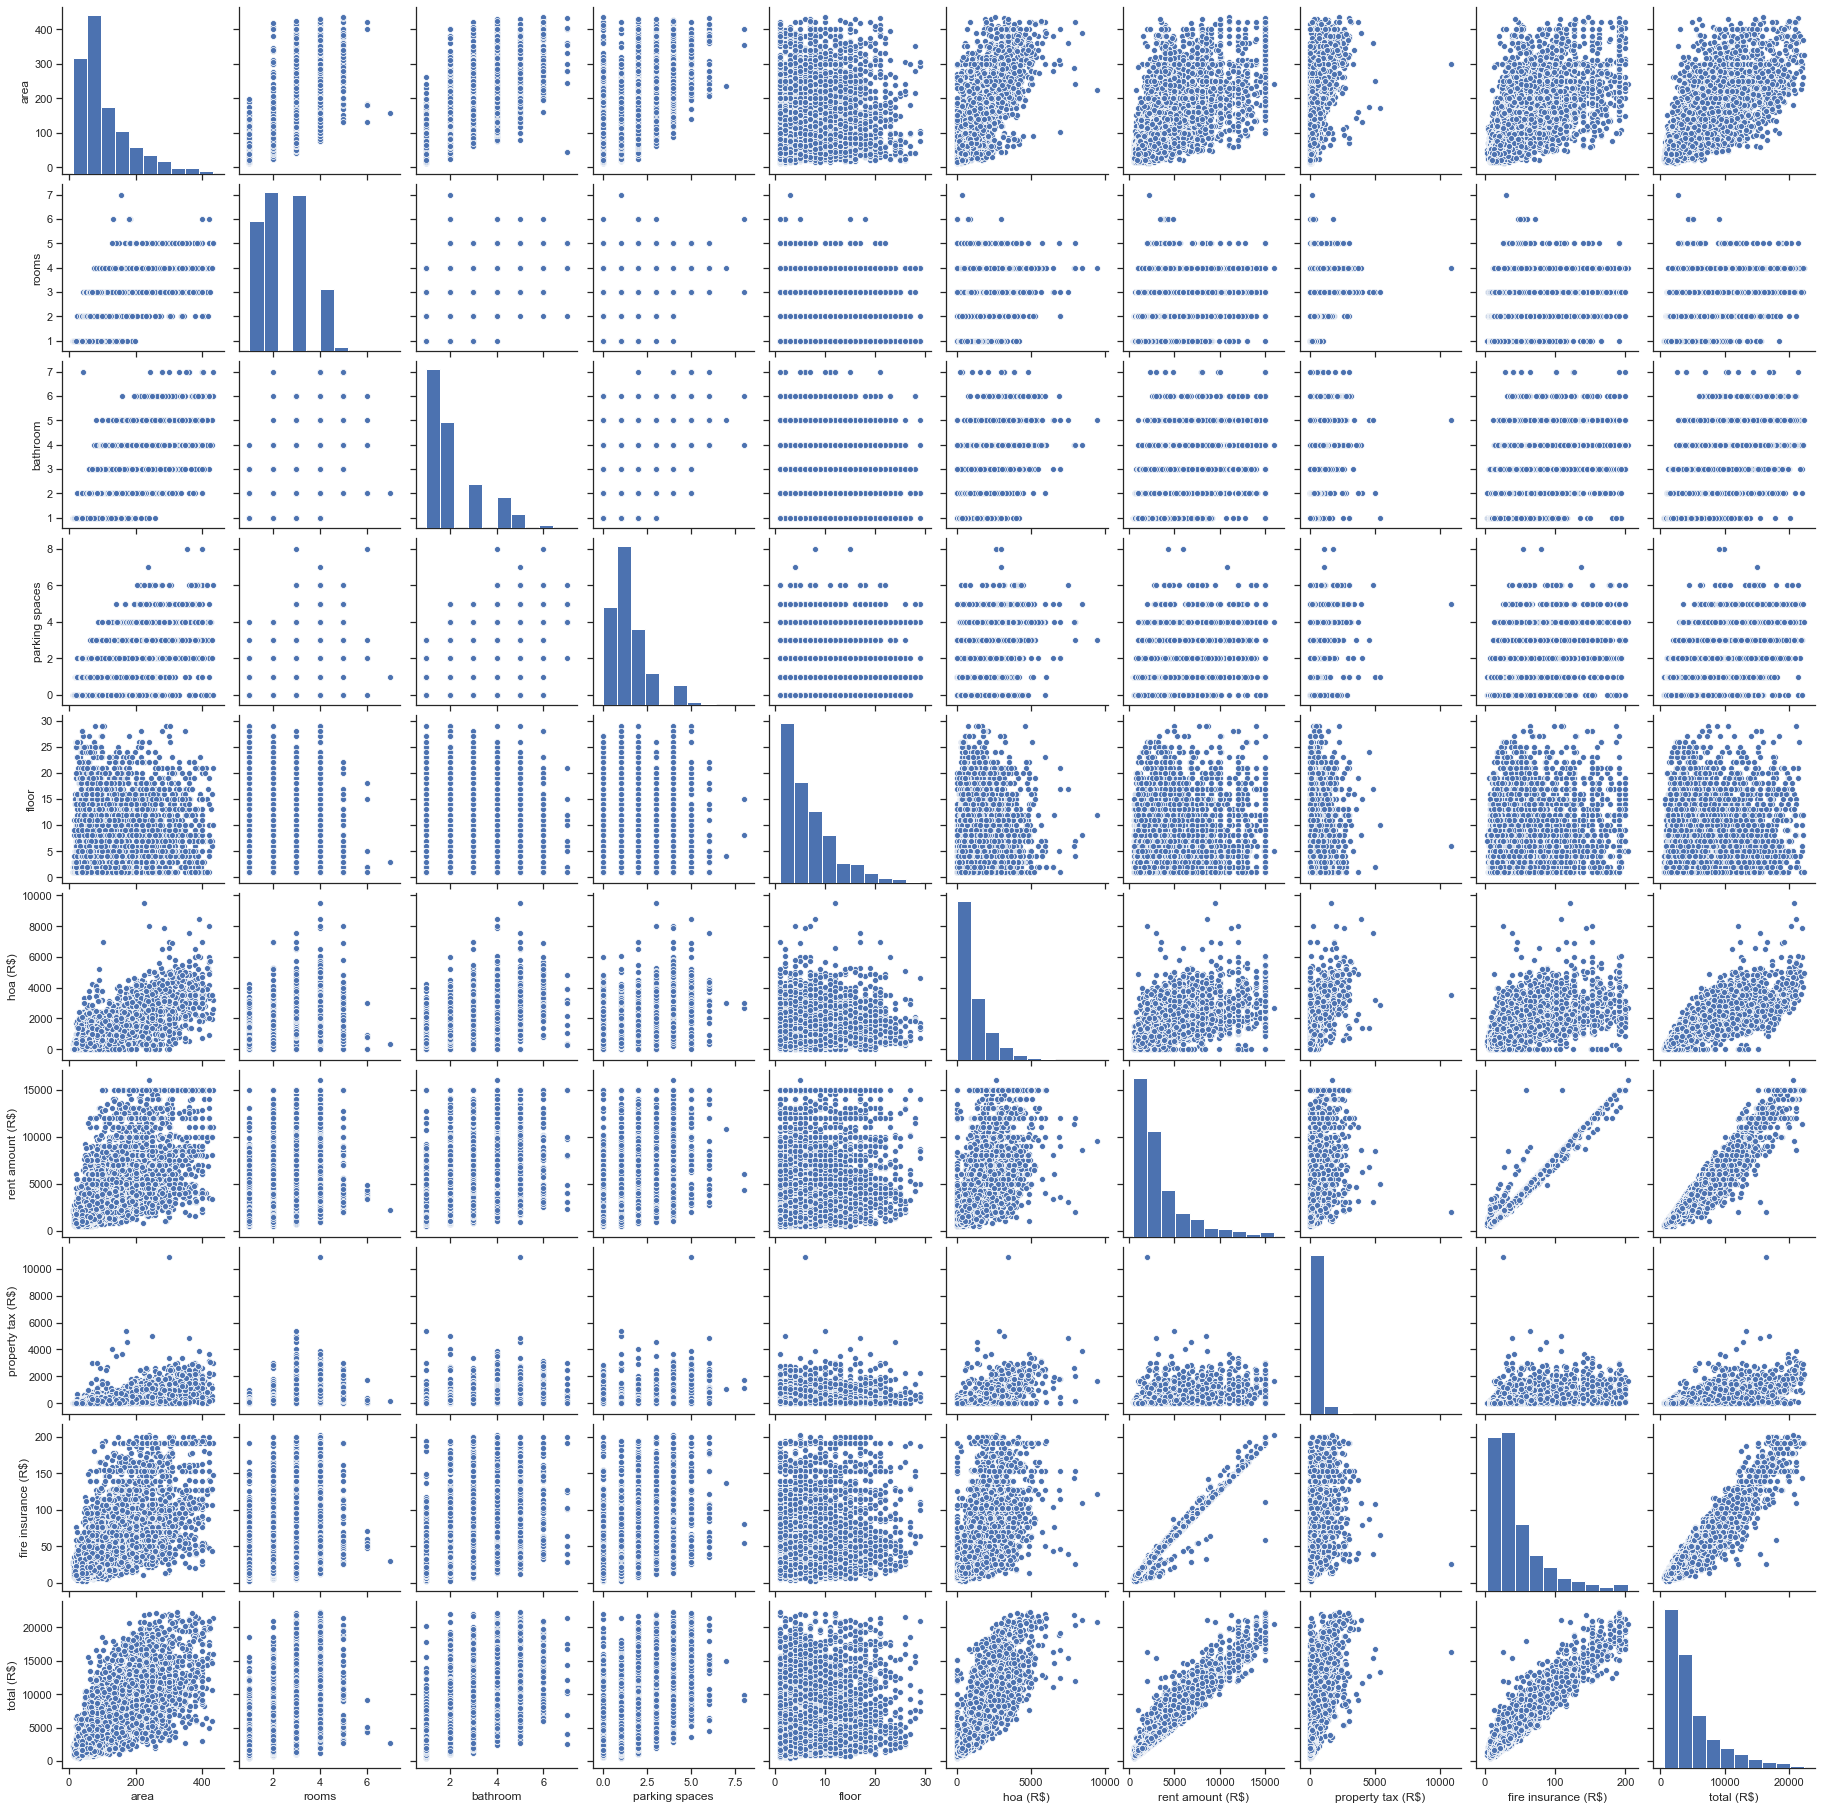

In [11]:
#Olhando a distribuicao dos valores
sns.pairplot(DF)

In [12]:
#Olhando informacoes incicais
DF.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000
mean,108.079071,2.316531,2.016185,1.323449,6.491105,1097.587349,3466.007289,274.645787,44.936002,4883.384235
std,79.487361,1.010940,1.202210,1.182642,5.147435,1008.954038,2965.773617,448.671528,37.856331,4076.495522
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,460.000000,0.000000,3.000000,507.000000
25%,53.000000,1.000000,1.000000,0.000000,2.000000,410.000000,1500.000000,35.000000,20.000000,2057.000000
50%,80.000000,2.000000,2.000000,1.000000,5.000000,741.500000,2450.000000,109.000000,32.000000,3399.000000
75%,140.000000,3.000000,3.000000,2.000000,9.000000,1500.000000,4200.000000,316.000000,55.000000,6212.500000
max,434.000000,7.000000,7.000000,8.000000,29.000000,9500.000000,16000.000000,10830.000000,203.000000,22350.000000


###### CORRELACOES

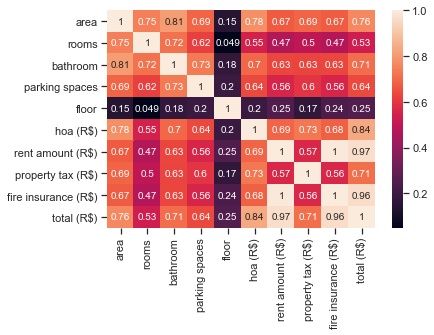

In [13]:
#Olhando correlacoes 
sns.heatmap(DF.corr(),annot=True)

#### 1.3 Analisando variaveis com o preco total.

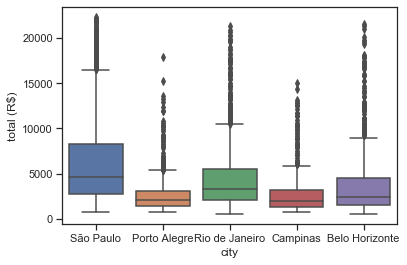

In [14]:

sns.boxplot(x='city', y = 'total (R$)', data=DF)

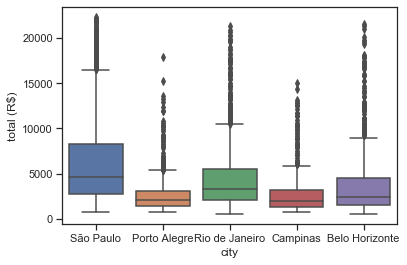

In [15]:

sns.boxplot(x='city', y = 'total (R$)', data=DF)

In [16]:
print("Maiores correlacores com preco total")
corr = DF.corr()
corr.sort_values(["total (R$)"], ascending = False, inplace = True)
print(corr["total (R$)"])

Maiores correlacores com preco total
total (R$)             1.000000
rent amount (R$)       0.970188
fire insurance (R$)    0.964525
hoa (R$)               0.836393
area                   0.764195
property tax (R$)      0.710365
bathroom               0.709257
parking spaces         0.637292
rooms                  0.534001
floor                  0.250776
Name: total (R$), dtype: float64


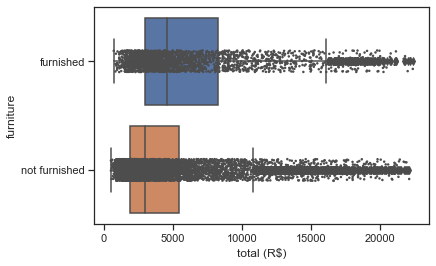

In [17]:
sns.boxplot(x= 'total (R$)',  y ='furniture', data=DF)
sns.stripplot(x= 'total (R$)',  y ='furniture', data=DF,color=".3",size=2.5)

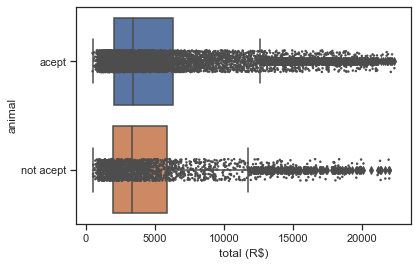

In [18]:
sns.boxplot(x= 'total (R$)',  y ='animal', data=DF)
sns.stripplot(x= 'total (R$)',  y ='animal', data=DF,color=".3",size = 2.5)

permitir ou não animais, nao tem influencia no preço total, já ter ou não mobília apresenta uma influência leve


##### 1.3.1 Analizando a influencia de area, banheiros e seguro incendio no preco total.

Foi selecionado essas três variáveis por conta de sua correlação com o preço total

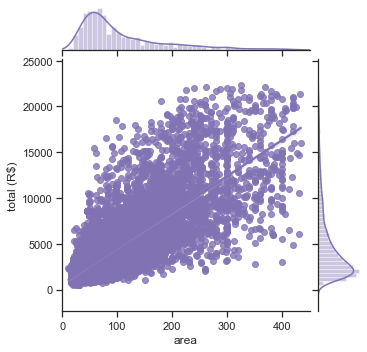

In [19]:
#analisando interferencia do area no total, corr 0.76
sns.jointplot("area", "total (R$)", data=DF,
                  kind="reg",
                  xlim=(0, 450),
                  color="m", height=5)

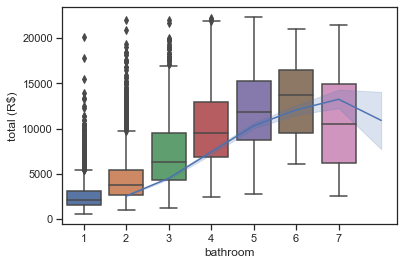

In [20]:
#Boxplot da relação entre quartos e valor total corr 0.7
sns.boxplot(x='bathroom', y='total (R$)', data=DF)
sns.lineplot(x='bathroom',  y='total (R$)', data=DF)

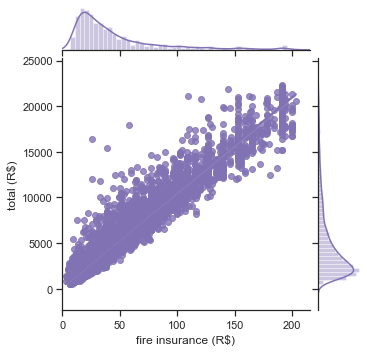

In [21]:
#analisando interferencia do fire insurance no total, corr 0.96
sns.jointplot("fire insurance (R$)", "total (R$)", data=DF,
                  kind="reg",
                  xlim=(0, 215),
                  color="m", height=5)

### 2.Analisando variaveis com a area

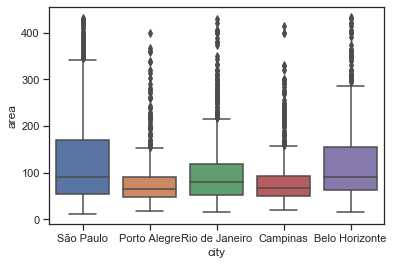

In [22]:

sns.boxplot(x='city', y = 'area', data=DF)

In [23]:
print("Maiores correlacores com preco area")
corr = DF.corr()
corr.sort_values(['area'], ascending = False, inplace = True)
print(corr['area'])

Maiores correlacores com preco area
area                   1.000000
bathroom               0.807251
hoa (R$)               0.778019
total (R$)             0.764195
rooms                  0.746666
property tax (R$)      0.689517
parking spaces         0.688916
fire insurance (R$)    0.673738
rent amount (R$)       0.672803
floor                  0.146399
Name: area, dtype: float64


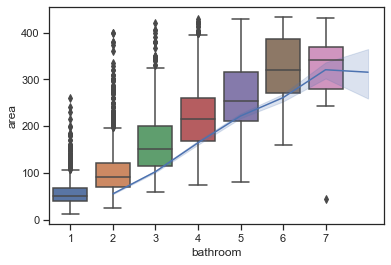

In [24]:
#Boxplot de area com quantidade de banheiros
sns.boxplot(x='bathroom', y = 'area', data=DF)
sns.lineplot(x='bathroom', y = 'area', data=DF)

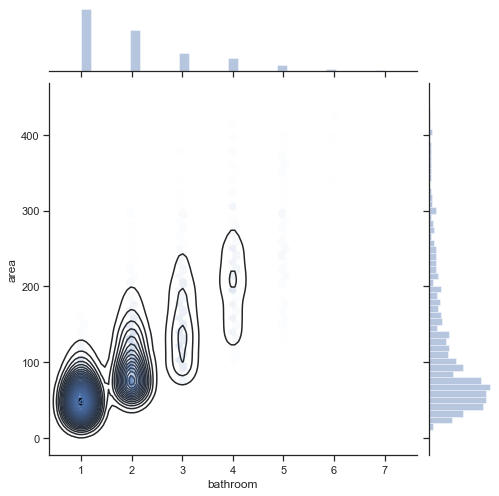

In [25]:
#criando uma zona de densidade de dados com area X bathroom
sns.jointplot("bathroom", "area", data=DF,kind="hex", height=7).plot_joint(sns.kdeplot, n_levels=30)

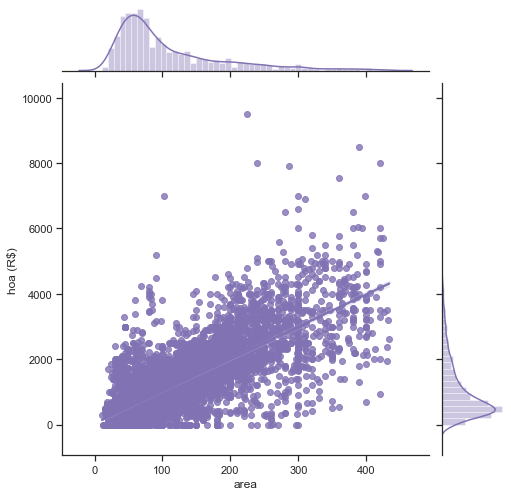

In [26]:
#analisando interferencia do fire insurance no total
sns.jointplot("area", "hoa (R$)", data=DF,
                  kind="reg",
                  color="m", height=7)

##### 2.1 Análise dos quartos
Foi visto que a maior correlação com a area é quatos e banheiros

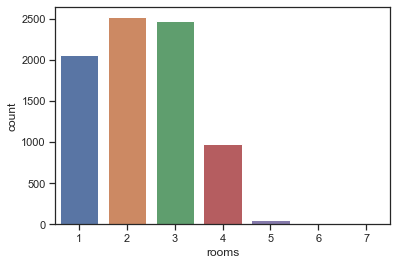

In [27]:
sns.countplot(x='rooms', data=DF) 

In [28]:
print("Maiores correlacores com preco rooms")
corr = DF.corr()
corr.sort_values(['rooms'], ascending = False, inplace = True)
print(corr['rooms'])

Maiores correlacores com preco rooms
rooms                  1.000000
area                   0.746666
bathroom               0.715899
parking spaces         0.618688
hoa (R$)               0.550444
total (R$)             0.534001
property tax (R$)      0.495461
fire insurance (R$)    0.469229
rent amount (R$)       0.465785
floor                  0.049314
Name: rooms, dtype: float64


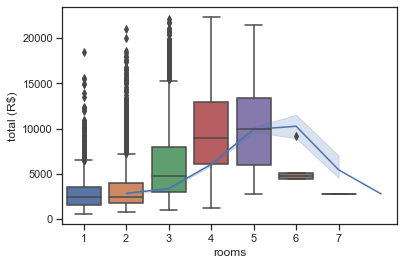

In [29]:
sns.boxplot(x='rooms', y='total (R$)', data=DF,) #Boxplot da relação entre quartos e valor total
sns.lineplot(x='rooms', y='total (R$)', data=DF)

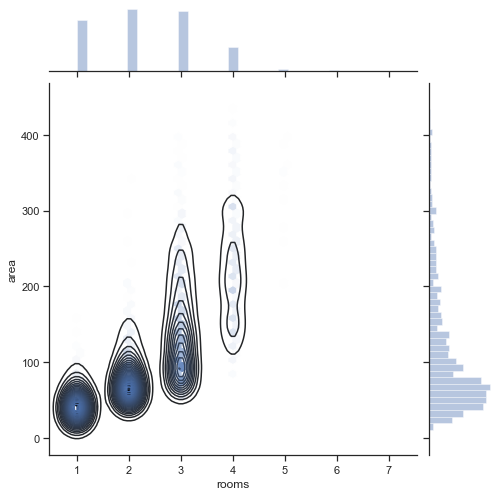

In [30]:
#criando uma zona de densidade de dados com rooms X area
sns.jointplot("rooms", "area", data=DF,kind="hex", height=7).plot_joint(sns.kdeplot, n_levels=30)

### 3. Analisando variaveis com bathroom

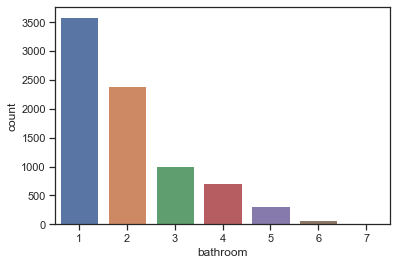

In [31]:
sns.countplot(x='bathroom', data=DF)

In [32]:
print("Maiores correlacores com bathroom")
corr = DF.corr()
corr.sort_values(['bathroom'], ascending = False, inplace = True)
print(corr['bathroom'])

Maiores correlacores com bathroom
bathroom               1.000000
area                   0.807251
parking spaces         0.733119
rooms                  0.715899
total (R$)             0.709257
hoa (R$)               0.697461
rent amount (R$)       0.634082
fire insurance (R$)    0.632675
property tax (R$)      0.630791
floor                  0.176444
Name: bathroom, dtype: float64


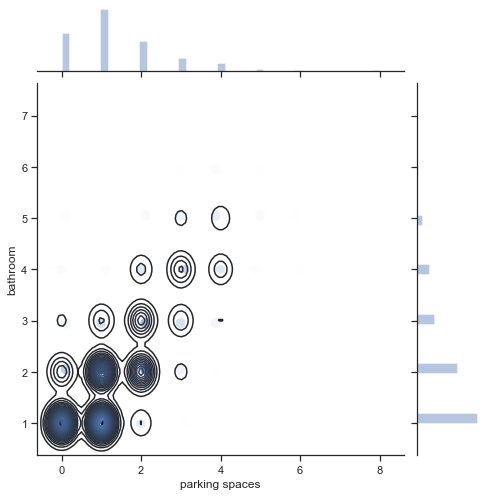

In [33]:
sns.jointplot("parking spaces", "bathroom", data=DF,kind="hex", height=7).plot_joint(sns.kdeplot, n_levels=30)

### 4. Analisando variaveis com fire insurance

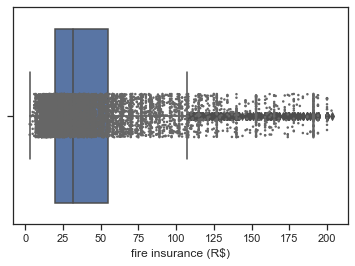

In [34]:
sns.boxplot(x="fire insurance (R$)", data=DF)
sns.stripplot(x="fire insurance (R$)", data=DF, color='0.4',size = 2.5)

In [35]:
print("Maiores correlacores com fire insurance (R$)")
corr = DF.corr()
corr.sort_values(['fire insurance (R$)'], ascending = False, inplace = True)
print(corr['fire insurance (R$)'])

Maiores correlacores com fire insurance (R$)
fire insurance (R$)    1.000000
rent amount (R$)       0.995101
total (R$)             0.964525
hoa (R$)               0.683164
area                   0.673738
bathroom               0.632675
property tax (R$)      0.564927
parking spaces         0.558943
rooms                  0.469229
floor                  0.241112
Name: fire insurance (R$), dtype: float64


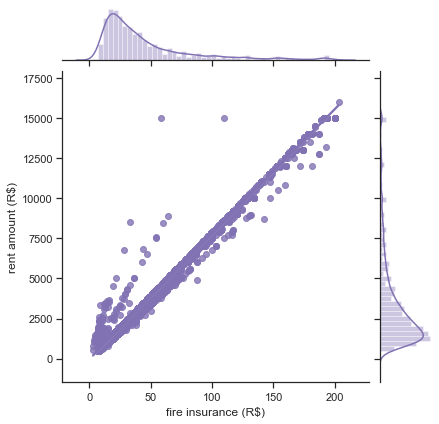

In [36]:
sns.jointplot("fire insurance (R$)", "rent amount (R$)", data=DF,
                  kind="reg",
                  color="m", height=6)

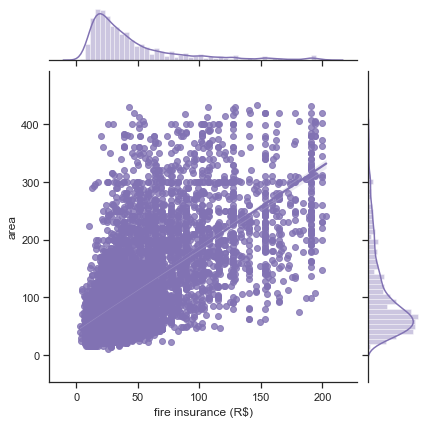

In [37]:
sns.jointplot("fire insurance (R$)", "area", data=DF,
                  kind="reg",
                  color="m", height=6)

## Criando a rede neural para predição dos dados

### 1. Pré-processamento

In [38]:
#dataframe apos a analise e limpeza inicial
DF.sample(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
9111,Rio de Janeiro,190,3,2,1,4,acept,not furnished,1800,5100,417,66,7383
7913,São Paulo,119,3,3,1,4,not acept,furnished,1500,3370,209,43,5122
8511,Porto Alegre,147,2,3,2,2,acept,furnished,400,7900,75,116,8491
5615,Rio de Janeiro,60,2,1,1,3,acept,not furnished,150,1800,0,24,1974
9845,São Paulo,140,1,2,2,1,not acept,furnished,1400,4500,334,58,6292


##### Catalogando faixa de preços do seguro incêndio para baixo,medio,medio alto e alto

In [39]:
#metrica para conversao conversao
# 
metrica_baixo =  DF["fire insurance (R$)"].mean() + DF["fire insurance (R$)"].std()*1
metrica_medio = DF["fire insurance (R$)"].mean() + DF["fire insurance (R$)"].std()*1.5
metrica_medioA = DF["fire insurance (R$)"].mean() + DF["fire insurance (R$)"].std()*2

def conversao(x):
    if  x <= metrica_baixo:
        return 1 #baixo
    elif (x > metrica_baixo and x <= metrica_medio):
        return 2 #medio
    elif (x > metrica_medio and x <= metrica_medioA):
        return 3 #medio alto
    elif x > metrica_medioA:
        return 4 #alto
    
DF["fire insurance (R$)"] = DF["fire insurance (R$)"].apply(conversao)


In [40]:
#eliminando as colunas que nao fazem parte do modelo
DF = DF.drop('hoa (R$)',axis = 1)
DF = DF.drop('rent amount (R$)',axis = 1)
DF = DF.drop('property tax (R$)',axis = 1)
DF.sample(1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,fire insurance (R$),total (R$)
2034,Porto Alegre,50,2,1,1,2,acept,not furnished,1,1582


In [41]:
DF.shape

(8094, 10)

In [42]:
#criando a array de previsores e preco
previsores = DF.iloc[:,0:9].values
preco_real = DF.iloc[:,9].values

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
labelencoder_previsores = LabelEncoder()
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [44]:
#Transformando classificacoes de strings para numeros
previsores[:,0] = labelencoder_previsores.fit_transform(previsores[:,0])
previsores[:,6] = labelencoder_previsores.fit_transform(previsores[:,6])
previsores[:,7] = labelencoder_previsores.fit_transform(previsores[:,7])
previsores

array([[4, 70, 2, ..., 0, 0, 1],
       [4, 320, 4, ..., 0, 1, 1],
       [2, 80, 1, ..., 0, 1, 1],
       ...,
       [4, 285, 4, ..., 0, 1, 4],
       [3, 70, 3, ..., 1, 0, 1],
       [3, 120, 2, ..., 0, 0, 4]], dtype=object)

In [45]:
#transformar as categorias em one hot encode
onehotencoder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'),[0,6,7,8])],   
    remainder='passthrough'                                 
)
previsores = onehotencoder.fit_transform(previsores)

In [46]:
#separando o dataset em 75% para treino e 25% para teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, preco_real, test_size=0.25)

In [47]:
print(previsores.shape)
print(preco_real.shape)

(8094, 18)
(8094,)


### 2. Modelagem da rede

In [48]:

from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError, MeanSquaredError
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.
C:\Users\Thiago Monteles\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Thiago Monteles\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Thiago Monteles\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Thiago Monteles\anaconda3\lib\site-packag

In [49]:
#REDE E TREINO 

#criando a rede neural
regressor = Sequential()
regressor.add(BatchNormalization())
regressor.add(Dense(units=9, activation = 'relu', input_dim = 18)) 
regressor.add(Dense(units=9, activation = 'relu')) 
regressor.add(Dense(units=1, activation = 'linear')) 

# a rede vai se basiar no mean_absolute_error(erro medio)
regressor.compile(loss = 'mean_absolute_error', optimizer = 'Nadam', metrics =['mean_absolute_error'])


In [50]:
resultado = regressor.fit(previsores_treinamento, classe_treinamento, batch_size = 300, epochs = 200)


Epoch 1/200
6070/6070 [==============================] - 0s 57us/step - loss: 4876.7890 - mean_absolute_error: 4876.7891
Epoch 2/200
6070/6070 [==============================] - 0s 6us/step - loss: 4875.6103 - mean_absolute_error: 4875.6113
Epoch 3/200
6070/6070 [==============================] - 0s 7us/step - loss: 4873.1833 - mean_absolute_error: 4873.1836
Epoch 4/200
6070/6070 [==============================] - 0s 6us/step - loss: 4867.9994 - mean_absolute_error: 4867.9990
Epoch 5/200
6070/6070 [==============================] - 0s 6us/step - loss: 4857.0229 - mean_absolute_error: 4857.0229
Epoch 6/200
6070/6070 [==============================] - 0s 7us/step - loss: 4834.5861 - mean_absolute_error: 4834.5859
Epoch 7/200
6070/6070 [==============================] - 0s 6us/step - loss: 4791.0954 - mean_absolute_error: 4791.0947
Epoch 8/200
6070/6070 [==============================] - 0s 6us/step - loss: 4711.6926 - mean_absolute_error: 4711.6924
Epoch 9/200
6070/6070 [===============

Epoch 67/200
6070/6070 [==============================] - 0s 7us/step - loss: 1024.6705 - mean_absolute_error: 1024.6703
Epoch 68/200
6070/6070 [==============================] - 0s 7us/step - loss: 1029.2626 - mean_absolute_error: 1029.2626
Epoch 69/200
6070/6070 [==============================] - 0s 7us/step - loss: 1019.2008 - mean_absolute_error: 1019.2009
Epoch 70/200
6070/6070 [==============================] - 0s 7us/step - loss: 1022.8780 - mean_absolute_error: 1022.8781
Epoch 71/200
6070/6070 [==============================] - 0s 9us/step - loss: 1020.3689 - mean_absolute_error: 1020.3690
Epoch 72/200
6070/6070 [==============================] - 0s 7us/step - loss: 1035.0728 - mean_absolute_error: 1035.0729
Epoch 73/200
6070/6070 [==============================] - 0s 7us/step - loss: 1014.9188 - mean_absolute_error: 1014.9188
Epoch 74/200
6070/6070 [==============================] - 0s 7us/step - loss: 1025.0814 - mean_absolute_error: 1025.0814
Epoch 75/200
6070/6070 [========

6070/6070 [==============================] - 0s 7us/step - loss: 1000.6460 - mean_absolute_error: 1000.6459
Epoch 135/200
6070/6070 [==============================] - 0s 7us/step - loss: 1014.7704 - mean_absolute_error: 1014.7704
Epoch 136/200
6070/6070 [==============================] - 0s 8us/step - loss: 1009.4604 - mean_absolute_error: 1009.4606
Epoch 137/200
6070/6070 [==============================] - 0s 11us/step - loss: 1017.9937 - mean_absolute_error: 1017.9937
Epoch 138/200
6070/6070 [==============================] - 0s 7us/step - loss: 1002.7426 - mean_absolute_error: 1002.7425
Epoch 139/200
6070/6070 [==============================] - 0s 6us/step - loss: 1020.5035 - mean_absolute_error: 1020.5035
Epoch 140/200
6070/6070 [==============================] - 0s 7us/step - loss: 1004.7388 - mean_absolute_error: 1004.7389
Epoch 141/200
6070/6070 [==============================] - 0s 7us/step - loss: 1007.4010 - mean_absolute_error: 1007.4010
Epoch 142/200
6070/6070 [============

In [51]:
classe_pred = regressor.predict(previsores_teste).astype('int64')

### 3. Resultados

#### Eliminando dados outlines que seja maior que (média + desvio*4) e catalogando preço do seguro em baixo,medio,medio alto e alto
modelo final proposto

Text(0.5, 0, 'epoch')

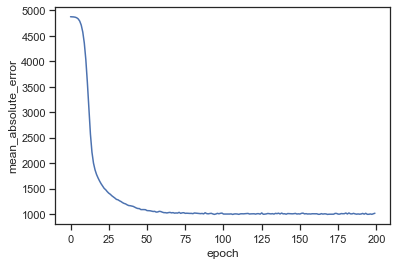

In [52]:
plt.plot(resultado.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

In [53]:
#Media de erro ao fazer previsao
regressor.evaluate(previsores_teste, classe_teste,verbose=0)

[984.2145101072289, 984.2144165039062]

In [55]:
comparacao= pd.DataFrame(classe_pred,columns=['predicao'])
comparacao['preco real']= pd.DataFrame(classe_teste)
comparacao.sample(7)

,predicao,preco real
1409,3563,4551
1981,19709,19660
1944,1988,2651
921,2158,2192
1989,4954,11680
1286,1703,1512
1031,2854,2861


### Outros resultados com desicoes diferentes do modelo final

#### Eliminando dados outlines que seja maior que  (média + desvio*2)

Text(0.5, 0, 'epoch')

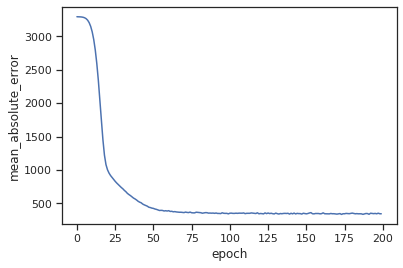

In [72]:
plt.plot(resultado.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

In [73]:
#Media de erro ao fazer previsao
regressor.evaluate(previsores_teste, classe_teste,verbose=0)

[337.23092587554294, 337.2309875488281]

In [74]:
comparacao= pd.DataFrame(classe_pred,columns=['predicao'])
comparacao['preco real']= pd.DataFrame(classe_teste)
comparacao.sample(7)

,predicao,preco real
49,3942,7439
963,2104,1433
520,4201,4848
518,4424,4222
1296,719,910
808,3540,4009
383,5239,5566


##### Eliminando dados outlines que seja maior que (média + desvio*4)

Text(0.5, 0, 'epoch')

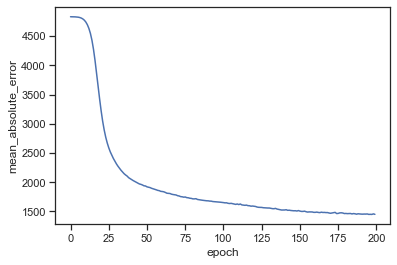

In [137]:
plt.plot(resultado.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

In [138]:
#Media de erro ao fazer previsao
regressor.evaluate(previsores_teste, classe_teste,verbose=0)

[1491.1999714365118, 1491.19970703125]

In [139]:
comparacao= pd.DataFrame(classe_pred,columns=['predicao'])
comparacao['preco real']= pd.DataFrame(classe_teste)
comparacao.sample(7)

,predicao,preco real
444,3538,10620
956,4046,4866
1749,1510,21190
514,3987,9808
151,3641,16570
367,2677,6529
1345,5182,4858


#### sem fazer tratamento de outlines

Text(0.5, 0, 'epoch')

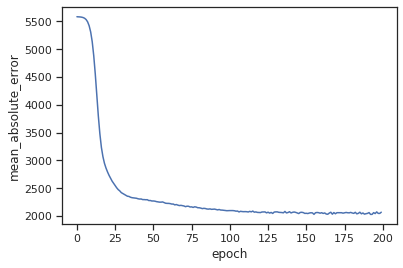

In [118]:
plt.plot(resultado.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

In [119]:
#Media de erro ao fazer previsao
regressor.evaluate(previsores_teste, classe_teste,verbose=0)

[1847.975474188001, 1847.9755859375]

In [120]:
comparacao= pd.DataFrame(classe_pred,columns=['predicao'])
comparacao['preco real']= pd.DataFrame(classe_teste)
comparacao.sample(7)

,predicao,preco real
519,4779,4366
1514,4193,3852
911,2022,1164
252,4080,2450
80,2906,1384
1868,5403,3345
84,3892,2165
